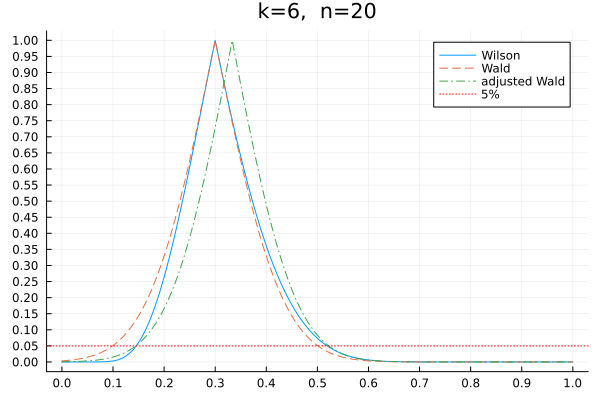

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_wilson(k, n, p)
    p̂ = k/n
    z = safediv(p̂ - p, √(p*(1-p)/n))
    2ccdf(Normal(), abs(z))
end

function pvalue_wald(k, n, p; adjustment=0)
    k += adjustment
    n += 2adjustment
    p̂ = k/n
    z = safediv(p̂ - p, √(p̂*(1-p̂)/n))
    2ccdf(Normal(), abs(z))
end

k, n = 6, 20
plot(p -> pvalue_wilson(k, n, p), 0, 1; label="Wilson")
plot!(p -> pvalue_wald(k, n, p), 0, 1; label="Wald", ls=:dash)
plot!(p -> pvalue_wald(k, n, p; adjustment=2), 0, 1; label="adjusted Wald", ls=:dashdot)
title!("k=$k,  n=$n")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
hline!([0.05]; label="5%", ls=:dot, c=:red)